In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
max_features = 10000
maxlen = 500
batch_size = 32
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Using TensorFlow backend.


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [5]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense
from keras.layers import LSTM
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(input_train, y_train,epochs=10,batch_size=128,validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 76s 4ms/step - loss: 0.5137 - acc: 0.7440 - val_loss: 0.3814 - val_acc: 0.8302
Epoch 2/10
20000/20000 [==============================] - 80s 4ms/step - loss: 0.3071 - acc: 0.8780 - val_loss: 0.3159 - val_acc: 0.8662
Epoch 3/10
20000/20000 [==============================] - 82s 4ms/step - loss: 0.2413 - acc: 0.9072 - val_loss: 0.3282 - val_acc: 0.8848
Epoch 4/10
20000/20000 [==============================] - 84s 4ms/step - loss: 0.2073 - acc: 0.9240 - val_loss: 0.2818 - val_acc: 0.8850
Epoch 5/10
20000/20000 [==============================] - 83s 4ms/step - loss: 0.1784 - acc: 0.9380 - val_loss: 0.3337 - val_acc: 0.8854
Epoch 6/10
20000/20000 [==============================] - 92s 5ms/step - loss: 0.1623 - acc: 0.9403 - val_loss: 0.3156 - val_acc: 0.8632
Epoch 7/10
20000/20000 [==============================] - 77s 4ms/step - loss: 0.1455 - acc: 0.9470 - val_loss: 0.9282 - val_acc:

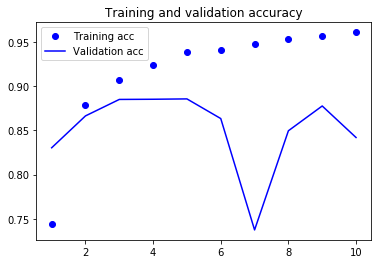

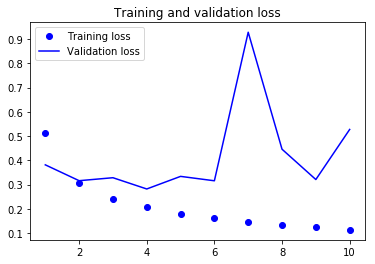

In [7]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()